In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

ROOT = "/content/drive/MyDrive/AI/AlphaML/Project"
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/AI/AlphaML/Project'

In [7]:
os.listdir()

['DatasetwashingtondbNormalized',
 'HandWritingRetrieval.ipynb',
 'Untitled0.ipynb']

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [9]:
data_path = "DatasetwashingtondbNormalized/washingtondb-v1.0"
image_path = f"{data_path}/data/word_images_normalized"
labels_file_path = f"{data_path}/ground_truth/word_labels.txt"
padded_image_path = f"{data_path}/processing/word_images_padded"
binary_vector_path = f"{data_path}/processing/word_images_binary_vectors"
binary_vector_path_labeled = f"{data_path}/processing/word_images_binary_vectors_labeled"

305-25-04.png
(120, 113, 3)


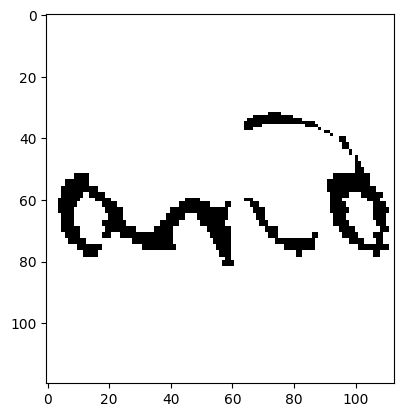

--------------------------------------------------
305-26-06.png
(120, 125, 3)


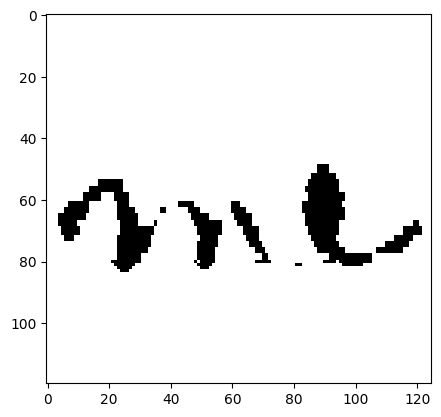

--------------------------------------------------
305-26-03.png
(120, 71, 3)


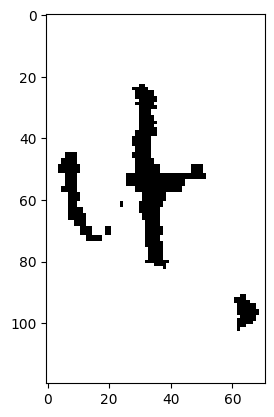

--------------------------------------------------
305-28-04.png
(120, 148, 3)


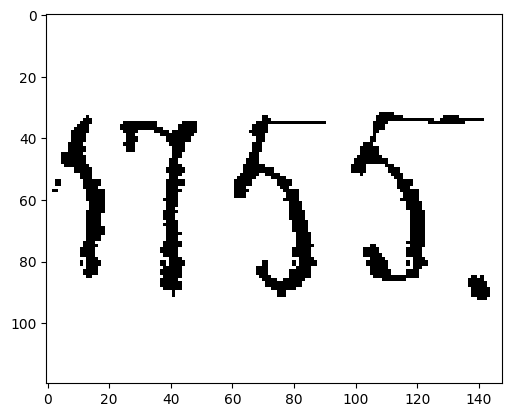

--------------------------------------------------
305-26-04.png
(120, 119, 3)


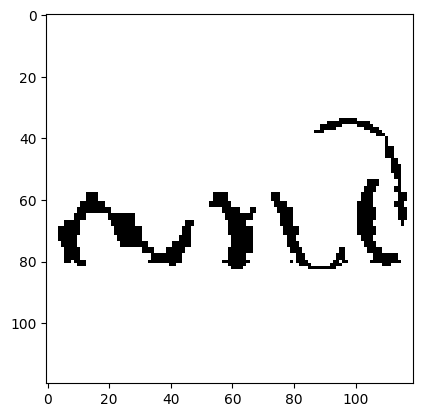

--------------------------------------------------


In [10]:
i = 0
for img in os.listdir(image_path):
    if img.endswith(".png"):
        print(img)
        img1 = cv2.imread(f"{image_path}/{img}")
        print(img1.shape)
        plt.imshow(img1)
        plt.show()
        print("-"*50)
        i += 1
        if i == 5:
          break

305-25-04.png
(120, 113, 3)
<class 'numpy.ndarray'>


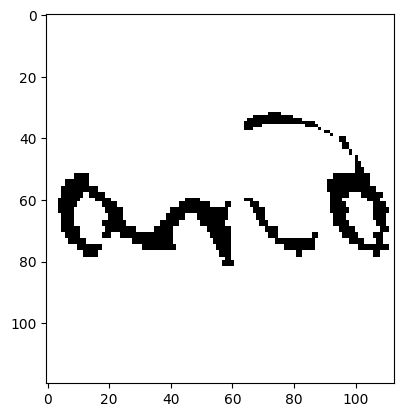

In [7]:
for img in os.listdir(image_path):
    if img.endswith(".png"):
        print(img)
        img1 = cv2.imread(f"{image_path}/{img}")
        print(img1.shape)
        plt.imshow(img1)
        print(type(img1))
        #print(img1)
        break

In [8]:
# Get maximum height and width across images
def get_max_width_height(image_path):
    img_list = [f"{image_path}/{img}" for img in os.listdir(image_path)]
    img_list.sort()
    print(img_list[0:10])
    widths_list = []
    heights_list = []
    for img in img_list:
        if img.endswith(".png"):
            #print(img)
            img1 = cv2.imread(img)
            height, width, _ = img1.shape
            widths_list.append(width)
            heights_list.append(height)
    return max(heights_list), max(widths_list)

max_height, max_width = get_max_width_height(image_path)
print(max_height, max_width)

['DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/.DS_Store', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-01.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-02.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-03.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-04.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-05.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-06.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-07.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-03-01.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-03-02.png']
120 645


In [9]:
def pad_and_save_images(image_path, target_folder, max_height, max_width):
    # Ensure the target folder exists
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for img in os.listdir(image_path):
        if img.endswith(".png"):
            # Read image
            img_path = os.path.join(image_path, img)
            image = cv2.imread(img_path)

            # Calculate padding
            height, width, _ = image.shape
            diff_height = max_height - height
            diff_width = max_width - width

            # Padding values for top, bottom, left and right respectively
            #top, bottom = diff_height // 2, diff_height - (diff_height // 2)
            #left, right = diff_width // 2, diff_width - (diff_width // 2)
            # Padding values for top, bottom, left and right respectively
            # Since padding is only on the right, top and bottom padding is 0
            top, bottom = 0, diff_height  # For vertical padding, if you want to match max_height
            left, right = 0, diff_width  # Only pad to the right

            # Apply padding
            color = [0, 0, 0] # Padding color: black
            new_img = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

            # Save the padded image
            cv2.imwrite(f"{target_folder}/{img}", new_img)

# Get the maximum dimensions
max_height, max_width = get_max_width_height(image_path)

# Pad and save images
pad_and_save_images(image_path, padded_image_path, max_height, max_width)


['DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/.DS_Store', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-01.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-02.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-03.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-04.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-05.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-06.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-01-07.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-03-01.png', 'DatasetwashingtondbNormalized/washingtondb-v1.0/data/word_images_normalized/270-03-02.png']


277-22-01.png
(120, 645, 3)


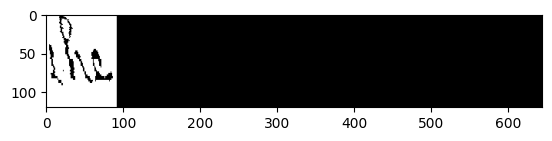

--------------------------------------------------
277-24-04.png
(120, 645, 3)


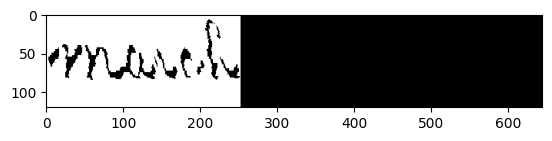

--------------------------------------------------
277-24-01.png
(120, 645, 3)


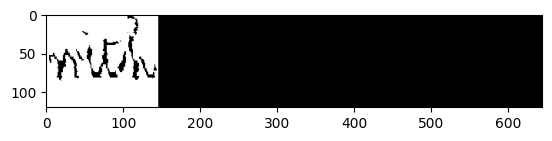

--------------------------------------------------
277-24-05.png
(120, 645, 3)


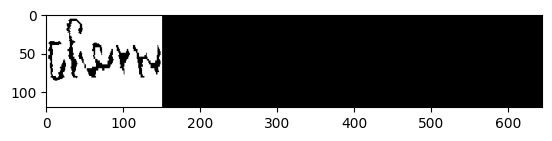

--------------------------------------------------
277-24-03.png
(120, 645, 3)


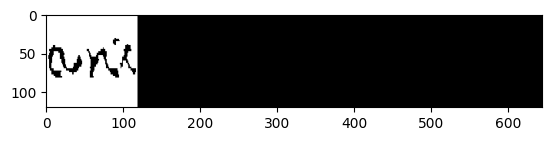

--------------------------------------------------


In [10]:
# Read 5 Padded image
i = 0
for img in os.listdir(padded_image_path):
    if img.endswith(".png"):
        print(img)
        img1 = cv2.imread(f"{padded_image_path}/{img}")
        print(img1.shape)
        plt.imshow(img1)
        plt.show()
        print("-"*50)
        i += 1
        if i == 5:
          break

In [11]:
# def image_to_binary_vector(image_path):
#     # Read the image
#     image = cv2.imread(image_path, 0)  # 0 to read image in grayscale mode

#     # Convert to binary (black and white)
#     _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

#     # Flatten the binary image to a 1D vector
#     binary_vector = binary_image.flatten()
#     return binary_vector

#     # Convert numpy array to a simple list of 0s and 1s
#     # binary_list = binary_vector.tolist()
#     # binary_list = [str(int(pixel/255)) for pixel in binary_list]  # Convert pixel values to 0 or 1
#     # return binary_list

# def save_binary_vectors(padded_image_folder, target_folder):
#     # Ensure the target folder exists
#     if not os.path.exists(target_folder):
#         os.makedirs(target_folder)

#     for img_file in os.listdir(padded_image_folder):
#         if img_file.endswith(".png"):
#             binary_vector = image_to_binary_vector(os.path.join(padded_image_folder, img_file))

#             # Convert the binary list to a string to write to file
#             #binary_string = ' '.join(binary_vector)

#             # Define the output text file path
#             binary_file_name = img_file.split('.')[0] + '.txt'
#             output_file_path = os.path.join(target_folder, binary_file_name)

#             # Write the binary string to the text file
#             with open(output_file_path, 'w') as file:
#                 #file.write(binary_string)
#                 file.write(binary_vector)

# # Convert and save binary vectors
# save_binary_vectors(padded_image_path, binary_vector_path)


In [12]:
# Function to read an image and convert it to a binary vector
def convert_and_save_binary_vector(img_path, binary_vector_dir):
    # Read the image as grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply a threshold to convert the image to binary
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Flatten the binary image to a 1D binary vector
    binary_vector = binary_img.flatten()

    # Save the binary vector to a file
    filename = os.path.basename(img_path).replace('.png', '.txt')
    binary_vector_file = os.path.join(binary_vector_dir, filename)
    np.savetxt(binary_vector_file, binary_vector, fmt='%d', delimiter=' ')

# Function to process all images in a directory
def process_images_to_binary_vectors(padded_img_path, binary_vector_path):
    # Create a directory for the binary vectors if it doesn't exist
    os.makedirs(binary_vector_path, exist_ok=True)

    # Process each padded image
    for img_file in os.listdir(padded_img_path):
        if img_file.endswith('.png'):
            img_path = os.path.join(padded_img_path, img_file)
            try:
                convert_and_save_binary_vector(img_path, binary_vector_path)
                #print(f"Processed {img_file}")
            except Exception as e:
                print(f"Failed to process {img_file}: {e}")

# Call the function to process all images
process_images_to_binary_vectors(padded_image_path, binary_vector_path)


In [13]:
def list_and_print_binary_files(directory, num_files=1):
    # List all files in the directory
    all_files = os.listdir(directory)

    # Filter for files that end with '.txt', assuming binary vectors are saved in text format
    txt_files = [file for file in all_files if file.endswith('.txt')]

    # Process only the first 'num_files' text files
    for txt_file in txt_files[:num_files]:
        file_path = os.path.join(directory, txt_file)

        # Read and print the contents of the file
        with open(file_path, 'r') as file:
            print(f"Contents of {txt_file}:")
            #print(file.read())
            #print("\n")  # Just for better readability

# List and print the first 5 binary files
list_and_print_binary_files(binary_vector_path)


Contents of 308-13-01.txt:


In [14]:
import shutil

def copy_labeled_binary_vectors(binary_vector_path, labels_file_path, binary_vector_path_labeled):
    # Create the new folder if it doesn't exist
    os.makedirs(binary_vector_path_labeled, exist_ok=True)

    # Read the labels from the labels file into a set for fast lookup
    with open(labels_file_path, 'r') as labels_file:
        labels = {line.strip().split(' ', 1)[0] for line in labels_file}

    # Count the number of files copied
    num_files_copied = 0

    # List binary vector files in the original folder and filter based on labels
    for filename in os.listdir(binary_vector_path):
        label = os.path.splitext(filename)[0]
        if label in labels:
            try:
                # Copy the file to the new folder
                source_path = os.path.join(binary_vector_path, filename)
                destination_path = os.path.join(binary_vector_path_labeled, filename)
                shutil.copy(source_path, destination_path)
                num_files_copied += 1
                #print(f"Copied {filename} to the new folder.")
            except Exception as e:
                print(f"Error copying {filename}: {e}")

    # Return the number of files copied
    return num_files_copied

# Call the function
num_files_copied = copy_labeled_binary_vectors(binary_vector_path, labels_file_path, binary_vector_path_labeled)
print(f"Copied {num_files_copied} files to the folder: {binary_vector_path_labeled}")


Copied 4894 files to the folder: DatasetwashingtondbNormalized/washingtondb-v1.0/processing/word_images_binary_vectors_labeled


In [11]:
# Normalize the data
from sklearn.preprocessing import normalize

# Function to read and normalize binary vectors
def read_and_normalize_binary_vectors(binary_vector_path_labeled):
    # Only list .txt files
    file_list = (file for file in os.listdir(binary_vector_path_labeled) if file.endswith('.txt'))

    # Initialize a list for storing binary vectors
    binary_vectors = []

    # Process each file
    for file in file_list:
        try:
            # Load the binary vector from the text file as a 2D array
            binary_vector = np.loadtxt(os.path.join(binary_vector_path_labeled, file), dtype=int).reshape(1, -1)

            # Normalize the binary vector and append to list
            normalized_vector = normalize(binary_vector, axis=1, norm='l2')
            binary_vectors.append(normalized_vector)

        except Exception as e:
            print(f"Error processing {file}: {e}")

    # Convert the list of normalized vectors to a NumPy array
    binary_vectors_array = np.vstack(binary_vectors)

    return binary_vectors_array

# Read and normalize the binary vectors and store them in a NumPy array
binary_vectors_normalized_array = read_and_normalize_binary_vectors(binary_vector_path_labeled)


In [12]:
binary_vectors_normalized_array[0:5]

array([[0.00987826, 0.00987826, 0.00987826, ..., 0.        , 0.        ,
        0.        ],
       [0.00625758, 0.00625758, 0.00625758, ..., 0.        , 0.        ,
        0.        ],
       [0.00987922, 0.00987922, 0.00987922, ..., 0.        , 0.        ,
        0.        ],
       [0.00901596, 0.00901596, 0.00901596, ..., 0.        , 0.        ,
        0.        ],
       [0.00639673, 0.00639673, 0.00639673, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
binary_vectors_normalized_array.shape

(4894, 77400)

In [14]:
def read_ground_truth_labels(labels_file_path):
    try:
        with open(labels_file_path, 'r') as f:
            # Use a list comprehension to process lines and extract labels
            ground_truth_labels = [line.split(' ', 1)[1] for line in f.read().splitlines() if len(line.split(' ', 1)) == 2]
        return ground_truth_labels
    except Exception as e:
        print(f"Error reading ground truth labels: {e}")
        return []

# Call the function and read the ground truth labels
ground_truth_labels = read_ground_truth_labels(labels_file_path)

In [15]:
ground_truth_labels[0:5]

['s_2-s_7-s_0-s_pt',
 'L-e-t-t-e-r-s-s_cm',
 'O-r-d-e-r-s',
 'a-n-d',
 'I-n-s-t-r-u-c-t-i-o-n-s-s_pt']

In [16]:
# from sklearn.metrics.pairwise import cosine_similarity

# def calculate_cosine_distances(vectors, num_samples_to_print=5):
#     """
#     Calculate cosine distances between all pairs of vectors and print some of the distances.

#     Parameters:
#     vectors (np.array): A 2D numpy array where each row is a vector.
#     num_samples_to_print (int): Number of cosine distances to print for each vector.

#     Returns:
#     np.array: A 2D numpy array of cosine distances.
#     """

#     # Calculate cosine distances between all pairs of vectors in the dataset
#     cosine_distances = 1 - cosine_similarity(vectors)

#     # Print some of the cosine distances if num_samples_to_print is specified
#     if num_samples_to_print > 0:
#         print("Some cosine distances:")
#         for i in range(min(num_samples_to_print, len(vectors))):
#             for j in range(min(num_samples_to_print, len(vectors))):
#                 print(f"Cosine Distance between vector {i} and vector {j}: {cosine_distances[i][j]:.4f}")

#     return cosine_distances

# # Calculate and print cosine distances
# cosine_distances = calculate_cosine_distances(binary_vectors_normalized_array)


In [17]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import normalize

# def calculate_distances_and_knn(vectors, n_neighbors=3):
#     """
#     Calculate L2 normalized vectors, cosine distances between all pairs of vectors,
#     and find nearest neighbors using KNN.

#     Parameters:
#     vectors (np.array): A 2D numpy array where each row is a vector.
#     n_neighbors (int): Number of nearest neighbors to find for each vector.

#     Returns:
#     Tuple[np.array, np.array]: A tuple containing:
#         - A 2D numpy array of cosine distances.
#         - A 2D numpy array where each row corresponds to the indices of the nearest neighbors for each vector.
#     """

#     # Normalize the vectors using L2 norm
#     vectors_normalized = normalize(vectors, norm='l2')

#     # Calculate cosine distances between all pairs of vectors in the dataset
#     cosine_distances = 1 - cosine_similarity(vectors_normalized)

#     # Initialize a KNN model using the cosine distance metric
#     knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
#     knn_model.fit(vectors_normalized)

#     # Find the nearest neighbors for each vector
#     neighbors_indices = np.zeros((vectors_normalized.shape[0], n_neighbors))
#     for i in range(vectors_normalized.shape[0]):
#         _, indices = knn_model.kneighbors(vectors_normalized[i].reshape(1, -1), return_distance=False)
#         neighbors_indices[i, :] = indices

#     return cosine_distances, neighbors_indices

# # Calculate cosine distances and nearest neighbors
# cosine_distances, neighbors_indices = calculate_distances_and_knn(binary_vectors_normalized_array)


ValueError: not enough values to unpack (expected 2, got 1)

In [19]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import normalize

# def calculate_distances_and_knn(vectors, n_neighbors=3):
#     """
#     Calculate L2 normalized vectors, cosine distances between all pairs of vectors,
#     and find nearest neighbors using KNN.

#     Parameters:
#     vectors (np.array): A 2D numpy array where each row is a vector.
#     n_neighbors (int): Number of nearest neighbors to find for each vector.

#     Returns:
#     Tuple[np.array, np.array]: A tuple containing:
#         - A 2D numpy array of cosine distances.
#         - A 2D numpy array where each row corresponds to the indices of the nearest neighbors for each vector.
#     """

#     # Normalize the vectors using L2 norm
#     vectors_normalized = normalize(vectors, norm='l2')

#     # Calculate cosine distances between all pairs of vectors in the dataset
#     cosine_distances = 1 - cosine_similarity(vectors_normalized)

#     # Initialize a KNN model using the cosine distance metric
#     knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
#     knn_model.fit(vectors_normalized)

#     # Find the nearest neighbors for each vector
#     neighbors_indices = np.zeros((vectors_normalized.shape[0], n_neighbors), dtype=int)
#     for i in range(vectors_normalized.shape[0]):
#         indices = knn_model.kneighbors(vectors_normalized[i].reshape(1, -1), return_distance=False)
#         neighbors_indices[i, :] = indices

#     return cosine_distances, neighbors_indices

# # Calculate cosine distances and nearest neighbors
# cosine_distances, neighbors_indices = calculate_distances_and_knn(binary_vectors_normalized_array)


In [ ]:
# Print the cosine distances and neighbor indices for the first 5 samples
print("Cosine Distances for the first 5 samples:")
print(cosine_distances[:5, :5])  # Adjust indices as needed for larger or smaller samples

print("\nNeighbor Indices for the first 5 samples:")
print(neighbors_indices[:5, :])  # Shows the indices of nearest neighbors for the first 5 samples

In [ ]:
# # Define the number of samples you want to print information for
# num_samples = 5

# # Print cosine distances for the first 'num_samples' vectors
# print("Cosine Distances:")
# for i in range(num_samples):
#     for j in range(num_samples):
#         print(f"Cosine Distance between vector {i} and vector {j}: {cosine_distances[i][j]:.4f}")


In [ ]:
# # Print the indices of nearest neighbors for the first 'num_samples' vectors
# print("\nNearest Neighbors Indices:")
# for i in range(num_samples):
#     print(f"Vector {i} Nearest Neighbors Indices: {neighbors_indices[i]}")

In [20]:
def l2_normalize_vectors(vectors):
    """Normalize vectors using L2 norm."""
    return normalize(vectors, norm='l2')


In [27]:
def calculate_distances_and_knn(vectors, n_neighbors=5):
    vectors_normalized = normalize(vectors, norm='l2')
    cosine_similarities = cosine_similarity(vectors_normalized)
    cosine_distances = 1 - cosine_similarities
    cosine_distances = np.clip(cosine_distances, 0, None)  # Ensure no negative distances

    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='precomputed')
    knn_model.fit(cosine_distances)  # Ensure this is treated as distances

    neighbors_indices = np.zeros((vectors_normalized.shape[0], n_neighbors), dtype=int)
    for i in range(vectors_normalized.shape[0]):
        # Note: No need to reshape or negate distances since it's precomputed
        indices = knn_model.kneighbors([cosine_distances[i]], return_distance=False)
        neighbors_indices[i, :] = indices

    return cosine_distances, neighbors_indices

In [28]:
def get_cosine_distance_l2_norm_and_knn(vectors, n_neighbors=5):
    """
    A comprehensive function that normalizes vectors using L2 norm, calculates cosine distances,
    and then finds the K-nearest neighbors.
    """
    # Normalize the vectors using L2 norm
    vectors_normalized = l2_normalize_vectors(vectors)

    # Calculate cosine distances between all pairs of vectors in the dataset
    neighbors_indices, cosine_distances = calculate_distances_and_knn(vectors_normalized)

    return vectors_normalized, cosine_distances, neighbors_indices


In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

# Normalize, calculate cosine distances, and find KNN as previously defined
normalized_vectors, cosine_distances, neighbors_indices = get_cosine_distance_l2_norm_and_knn(binary_vectors_normalized_array)

# Ensure the lengths match
assert len(ground_truth_labels) == normalized_vectors.shape[0], "Mismatch in number of labels and vectors."

average_precision_values = []

for i, query_label in enumerate(ground_truth_labels):
    query_distances = cosine_distances[i]  # Ensure this is 1D and has the same length as ground_truth_labels
    relevance_scores = [1 if label == query_label else 0 for label in ground_truth_labels]

    # Negate query distances as higher values mean lower similarity, which is expected for precision_recall_curve
    precision, recall, _ = precision_recall_curve(relevance_scores, -query_distances)
    average_precision = average_precision_score(relevance_scores, -query_distances)
    average_precision_values.append(average_precision)

MAP = np.mean(average_precision_values)
print("Mean Average Precision (MAP) for the dataset:", MAP)


ValueError: Found input variables with inconsistent numbers of samples: [4894, 3]

In [31]:
# Assuming 'normalized_vectors' and 'cosine_distances' are from previous calculations
print("Shape of normalized_vectors:", normalized_vectors.shape)
print("Shape of cosine_distances:", cosine_distances.shape)
print("Number of ground_truth_labels:", len(ground_truth_labels))

# Ensure all sizes match appropriately
assert cosine_distances.shape[0] == cosine_distances.shape[1] == len(ground_truth_labels), "Data size mismatch."


Shape of normalized_vectors: (4894, 77400)
Shape of cosine_distances: (4894, 3)
Number of ground_truth_labels: 4894


AssertionError: Data size mismatch.